In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Для изучения выберем распределение Максвелла. Смоделируем выборку объемом 1000 и посмотрим на гистограмму и теоретическую плотность вероятности. 

In [107]:
sample = sts.maxwell.rvs(size = 1000)

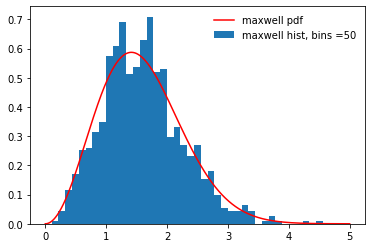

In [110]:
x = np.linspace(0, 5, 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(x, sts.maxwell.pdf(x), 'r-', label='maxwell pdf')
ax.hist(sample, density=True, bins =40, histtype='stepfilled', label = 'maxwell hist, bins =50')
ax.legend(loc='best', frameon=False)
plt.show()

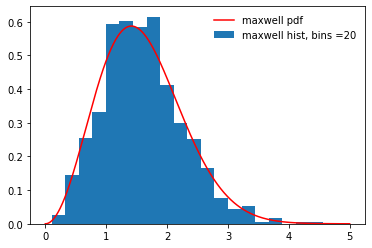

In [111]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, sts.maxwell.pdf(x), 'r-', label='maxwell pdf')
ax.hist(sample, density=True, bins =20, histtype='stepfilled', label = 'maxwell hist, bins =20')
ax.legend(loc='best', frameon=False)
plt.show()

Как видно на графиках, выше моделируется то, что нужно :) 
Перейдем к изучению распредления выборочных средних.

In [132]:
mean, var = sts.maxwell.stats(moments = 'mv') #теоретические значения мат. ожидания и дисперсии
print(mean, var)

1.5957691216057308 0.6734396116428514


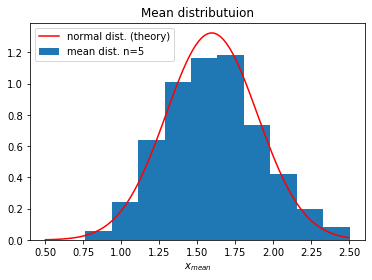

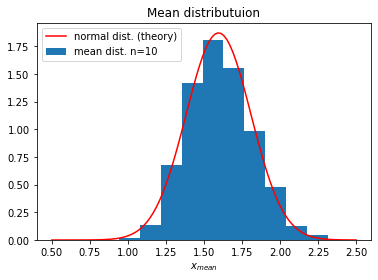

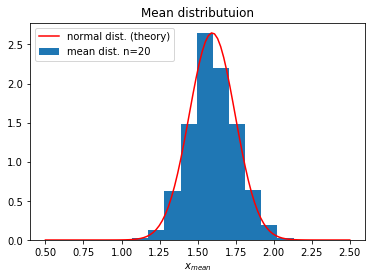

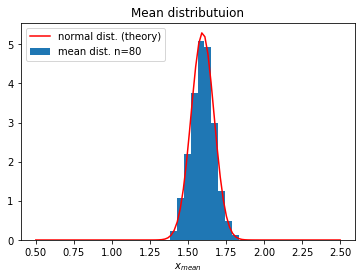

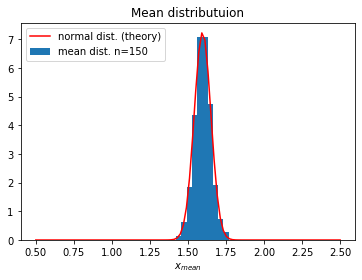

In [154]:
x = np.linspace(0.5, 2.5, 100)
for n in [5,10,20, 80, 150]:
    rv = sts.norm(loc = mean, scale = np.sqrt(var/n))
    mean_dist = [] 
    for k in range(1000):
        sample = sts.maxwell.rvs(size = n) 
        mean_dist.append(sample.mean())
    #fig, ax = plt.subplots(1, 1)
    plt.plot(x, rv.pdf(x), 'r-', label='normal dist. (theory)')
    plt.hist(mean_dist, density = True, histtype='stepfilled', label = 'mean dist. n=%s' %n)
    plt.legend()
    plt.title("Mean distributuion")
    plt.xlabel('$x_{mean}$')
    plt.show()

Из приведенных выше графиков видно, что ЦПТ отлично описывает распредление выборочных средних для распределения Максвелла, уже при n, равных порядка 10. С увеличением n, точность возрастает и среднее значение распределения выборочных средних приближается к теоретическому значению.